Mean Squared Errors:  [11.41356220553599, 11.41356125245063, 11.413559934842754, 11.41355785298472, 11.413556024415508, 11.413553557226583, 11.413551798302182, 11.413549790657518, 11.413546767333694, 11.413544223924887, 11.413541285187893, 11.413538303217456, 11.413535017514315, 11.413531363021265, 11.413527642930736, 11.413523735126777, 11.413519158612385, 11.413514856609256, 11.41351011216732, 11.413504946181805, 11.41349940746864, 11.41349340811269, 11.413486870975012, 11.413479723976973, 11.413471727087922, 11.413463344325487, 11.413454153572408, 11.413444149785905, 11.413433524309854, 11.41342222867404, 11.413410487342414, 11.413397385248505, 11.413383648378764, 11.413368846237859, 11.413353663029259, 11.413338088629073, 11.413321662074035, 11.413304354794231, 11.413286927822556, 11.413270358158538, 11.413253169566513, 11.413236856045303, 11.413222496429954, 11.41321007517198, 11.413200779405745, 11.413195531091246, 11.41319589771823, 11.413203589602022, 11.413222316291705, 11.413

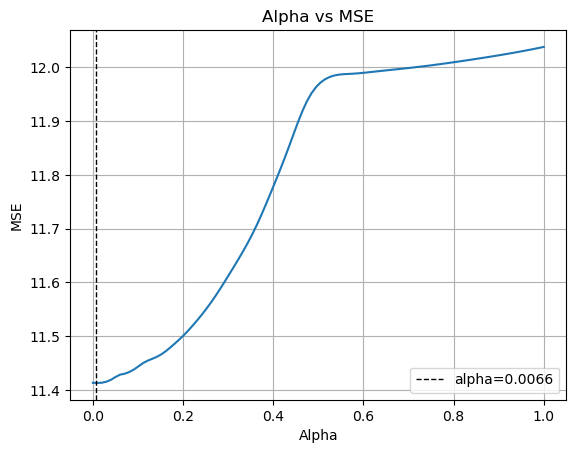

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from scipy.interpolate import make_interp_spline


## PROBLEM 1: LASSO REGRESSION ##
data = pd.read_csv('auto_mpg.csv')
data = data.drop(columns=['car name'])
index = data[data['horsepower'] == '?'].index
data = data.drop(index)

X = data.iloc[:, 1:]
y = data.iloc[:, 0]


## Part A ##

# 10 fold cross validation for alpha
cv = KFold(10, random_state = 1, shuffle = True) # 10 fold cross validator
alphas = np.geomspace(0.0001, 1, 100)
mean_errors = []

for i, alpha in enumerate(alphas):
    lasso_model = Lasso(alphas[i])
    score = cross_val_score(lasso_model, X, y, scoring='neg_mean_squared_error', cv=cv) # score using neg because sklearn maximizes score
    
    mean_errors.append(-score.mean())

print("Mean Squared Errors: ", mean_errors)
min_mse = mean_errors.index(min(mean_errors))
print("Minimum value: ", mean_errors[min_mse])

# produce smooth lines for plotting
x_new = np.linspace(min(alphas), max(alphas), 100)
spline = make_interp_spline(alphas, mean_errors, k=3)
y_smooth = spline(x_new)

# plot
plt.figure()
plt.plot(x_new, y_smooth)
plt.grid()
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Alpha vs MSE")
plt.axvline(alphas[min_mse], color='k', linestyle='--', lw = 1, label=f'alpha={alphas[min_mse].round(4)}')
plt.legend()
plt.savefig("./images/QAplot")

# ax.errorbar(np.log(tuned_lasso.alphas_),
# tuned_lasso.mse_path_.mean(1),
# yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
# ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
# ax.set_ylim([50000,250000])
# ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
# ax.set_ylabel('Cross-validated MSE', fontsize=20)


(100,)
(100,)


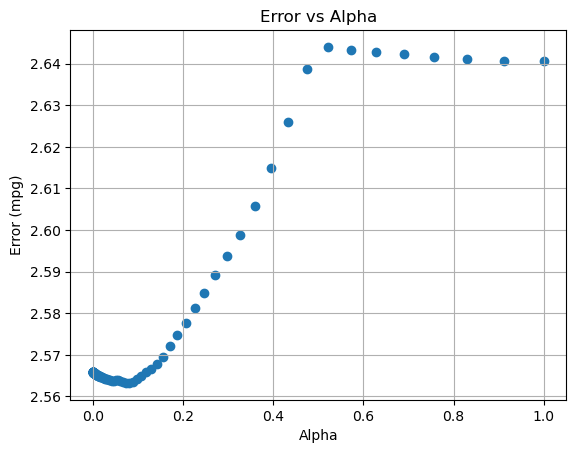

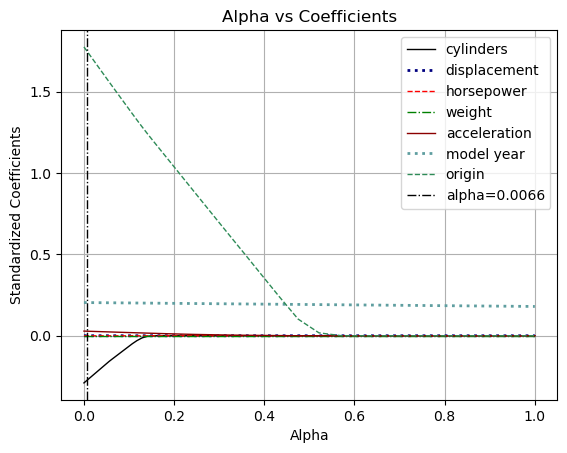

In [210]:
from sklearn.preprocessing import StandardScaler

## Part B ##
coefficients = []
predictions = []
for i, alpha in enumerate(alphas):
    lasso_model = Lasso(alphas[i]) 

    Xn = X.to_numpy()
    yn = y.to_numpy()

    # Perform cross-validation with cross_val_predict
    pred = cross_val_predict(lasso_model, Xn, yn, cv=cv)
    predictions.append(pred)
    
    coeff = []
    for train_indices, test_indices in cv.split(X):
        lasso_model.fit(Xn[train_indices], yn[train_indices])
        scaler = StandardScaler()
        scaler.fit(Xn[train_indices])
        standardized_coefficients = lasso_model.coef_ / scaler.scale_
        coeff.append(standardized_coefficients)
    
    means = [np.mean([item[i] for item in coeff]) for i in range(len(coeff[0]))] # averaging out the 10 split's coefficient values
    coefficients.append(means)

# predictions = np.mean(predictions, axis = 0)

err = []
for i in range(len(predictions)):
    err.append(np.mean(abs(predictions[i] - y)))

# err = (predictions - y) / len(predictions)
err = np.array(err)
print(err.shape)
print(alphas.shape)
plt.figure()
plt.scatter(alphas, err)
plt.grid()
plt.xlabel("Alpha")
plt.ylabel("Error (mpg)")
plt.title("Error vs Alpha")
plt.savefig("./images/QBplot3")

# plot standardized coefficients
plt.figure()
plt.grid()
plt.xlabel("Alpha")
plt.ylabel("Standardized Coefficients")
plt.title("Alpha vs Coefficients")
plt.plot(alphas, [item[0] for item in coefficients], color='k', linestyle='solid', lw = 1, label=data.columns[1])
plt.plot(alphas, [item[1] for item in coefficients], color='navy', linestyle='dotted', lw = 2, label=data.columns[2])
plt.plot(alphas, [item[2] for item in coefficients], color='r', linestyle='dashed', lw = 1, label=data.columns[3])
plt.plot(alphas, [item[3] for item in coefficients], color='g', linestyle='dashdot', lw = 1, label=data.columns[4])
plt.plot(alphas, [item[4] for item in coefficients], color='darkred', linestyle='solid', lw = 1, label=data.columns[5])
plt.plot(alphas, [item[5] for item in coefficients], color='cadetblue', linestyle='dotted', lw = 2, label=data.columns[6])
plt.plot(alphas, [item[6] for item in coefficients], color='seagreen', linestyle='dashed', lw = 1, label=data.columns[7])
plt.axvline(alphas[min_mse], color='k', linestyle='dashdot', lw = 1, label=f'alpha={alphas[min_mse].round(4)}')
plt.legend()
plt.savefig("./images/QBplot")
